<a href="https://colab.research.google.com/github/Piyumi22/Optimization-/blob/main/E_17_259Lab02_EM502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as plat

import sympy as sym

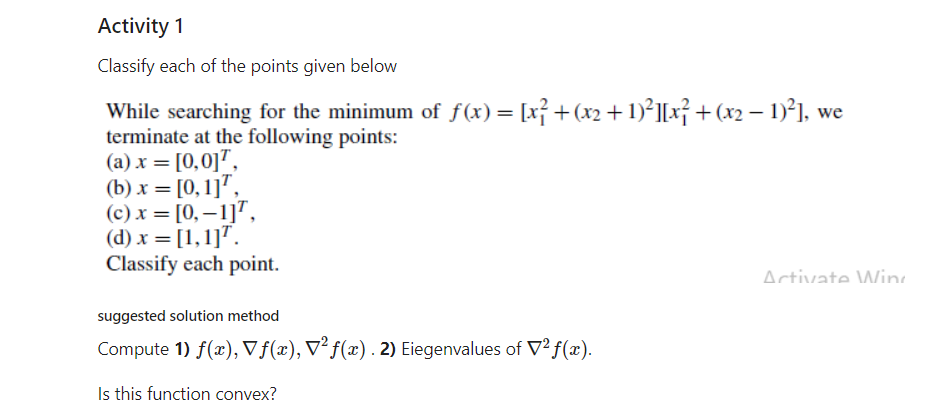

#a)

f(x*) =  1 



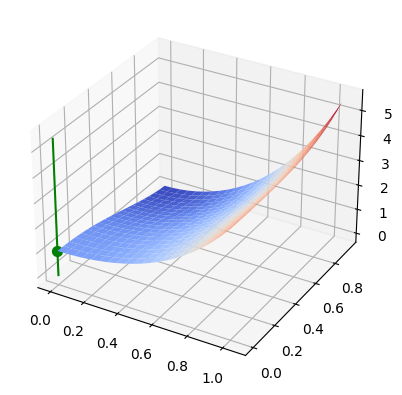

In [ ]:
## Define Python function
def func_1(x):
    f=(x[0]**2+(x[1]+1)**2)*(x[0]**2+(x[1]-1)**2)

    return f

#we investigate the point that  is a candidate for a minimum
xtest = np.array([0,0])
ftest = func_1(xtest)
print("f(x*) = ",func_1(xtest),"\n")

## Make 3D plot to visualize
x1 = np.arange(0.0,1.1,0.05)
x2 = np.arange(0.0,1.0,0.05)

# Create a matrix of all points to sample
X1, X2 = np.meshgrid(x1, x2)
n1 = len(x1)
n2 = len(x2)


F = np.zeros([n2, n1])

xtemp = np.zeros(2)

# Evaluate f(x) over grid
for i in range(0,n1):
    xtemp[0] = x1[i]
    for j in range(0,n2):
        xtemp[1] = x2[j]
        F[j,i] = func_1(xtemp)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot f(x)
surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

# Add candidate point
ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)


fmax = np.amax(F)
fmin = np.amin(F)
ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")

plt.show()

In [ ]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x):


    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

  #  if(verbose):
     #   print("***** grad_central at x = ",x,"*****")

    for i in range(0,n):

        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Finite difference formula with central difference
        f_plus = func_1(x + e)
        f_minus = func_1(x - e)


        #CENTRAL DIFFERENCE APPROXIMATION
        grad[i] = (f_plus - f_minus)/(2*eps)



    return grad

grad = grad_central(xtest)
print(grad)

[0. 0.]


In [ ]:
def hessian_central(x):


    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Evaluate gradient twice
        grad_plus = grad_central(x + e)
        grad_minus = grad_central(x - e)

        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)



    return H

H = hessian_central(xtest)
print(H)

[[ 3.99991151  0.        ]
 [ 0.         -3.99991151]]


In [ ]:
#Using symbolic python to find gradient

# Define function to use with symbolic computing
def f(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

# Define function to use later
def grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])

x = np.array([0.7395,0.3144])
print("The exact gradient is \n",grad_exact(x))

The exact gradient is 
 [0.00390193 0.01507813]


In [ ]:
def f(x1,x2):

    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


def hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])

x = np.array([0.7395,0.3144])
print("The exact Hessian is \n",hes_exact(x))

The exact Hessian is 
 [[ 76.99960509 108.34139034]
 [108.34139034 392.71911223]]


In [ ]:
# Computing Eiegenvalues of the Hessian Matrix
#print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n"
)
#print("Eigenvectors = \n",v,"\n")

Eigenvalues =  [ 3.99991151+0.j -3.99991151+0.j] 



Gradient is zero. Therefore this is a stationary point. Since the Hessian has both positive and negative eigenvalues
we can say that this is a saddle point.

#b)

f(x*) =  0 



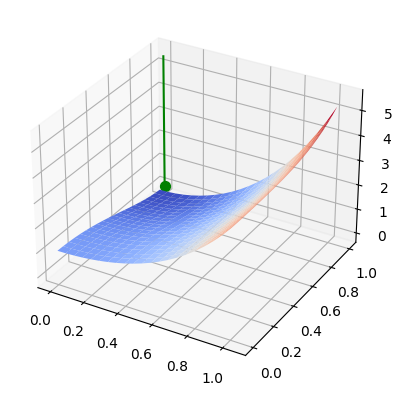

In [ ]:
## Define Python function
def func_1(x):
    f=(x[0]**2+(x[1]+1)**2)*(x[0]**2+(x[1]-1)**2)

    return f

#we investigate the point that  is a candidate for a minimum
xtest = np.array([0,1])
ftest = func_1(xtest)
print("f(x*) = ",func_1(xtest),"\n")

## Make 3D plot to visualize
x1 = np.arange(0.0,1.1,0.05)
x2 = np.arange(0.0,1.0,0.05)

# Create a matrix of all points to sample
X1, X2 = np.meshgrid(x1, x2)
n1 = len(x1)
n2 = len(x2)


F = np.zeros([n2, n1])

xtemp = np.zeros(2)

# Evaluate f(x) over grid
for i in range(0,n1):
    xtemp[0] = x1[i]
    for j in range(0,n2):
        xtemp[1] = x2[j]
        F[j,i] = func_1(xtemp)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot f(x)
surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

# Add candidate point
ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)


fmax = np.amax(F)
fmin = np.amin(F)
ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")

plt.show()

In [ ]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x):


    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

  #  if(verbose):
     #   print("***** grad_central at x = ",x,"*****")

    for i in range(0,n):

        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Finite difference formula with central difference
        f_plus = func_1(x + e)
        f_minus = func_1(x - e)


        #CENTRAL DIFFERENCE APPROXIMATION
        grad[i] = (f_plus - f_minus)/(2*eps)



    return grad

grad = grad_central(xtest)
print(grad)

[0.00000000e+00 3.99955591e-12]


In [ ]:
def hessian_central(x):


    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Evaluate gradient twice
        grad_plus = grad_central(x + e)
        grad_minus = grad_central(x - e)

        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)



    return H

H = hessian_central(xtest)
print(H)

[[8. 0.]
 [0. 8.]]


In [ ]:
#Using symbolic python to find gradient

# Define function to use with symbolic computing
def f(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

# Define function to use later
def grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])

x = np.array([0.7395,0.3144])
print("The exact gradient is \n",grad_exact(x))

The exact gradient is 
 [0.00390193 0.01507813]


In [ ]:
def f(x1,x2):

    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


def hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])

x = np.array([0.7395,0.3144])
print("The exact Hessian is \n",hes_exact(x))

The exact Hessian is 
 [[ 76.99960509 108.34139034]
 [108.34139034 392.71911223]]


In [ ]:
# Computing Eiegenvalues of the Hessian Matrix
#print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n"
)
#print("Eigenvectors = \n",v,"\n")

Eigenvalues =  [8.+0.j 8.+0.j] 



Gradient is zero therefore a stationary piont. Since hessian matrix has positive eigenvalues, its positive definite. Therefore we can say
that this point is a local minimum.


#c)

f(x*) =  0 



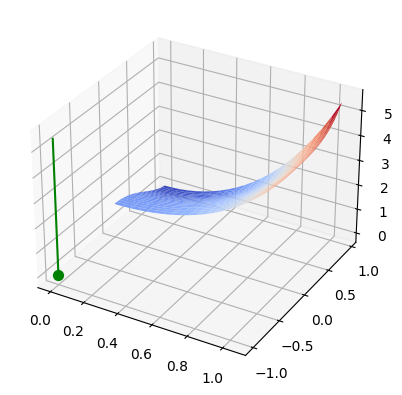

In [ ]:
## Define Python function
def func_1(x):
    f=(x[0]**2+(x[1]+1)**2)*(x[0]**2+(x[1]-1)**2)

    return f

#we investigate the point that  is a candidate for a minimum
xtest = np.array([0,-1])
ftest = func_1(xtest)
print("f(x*) = ",func_1(xtest),"\n")

## Make 3D plot to visualize
x1 = np.arange(0.0,1.1,0.05)
x2 = np.arange(0.0,1.0,0.05)

# Create a matrix of all points to sample
X1, X2 = np.meshgrid(x1, x2)
n1 = len(x1)
n2 = len(x2)


F = np.zeros([n2, n1])

xtemp = np.zeros(2)

# Evaluate f(x) over grid
for i in range(0,n1):
    xtemp[0] = x1[i]
    for j in range(0,n2):
        xtemp[1] = x2[j]
        F[j,i] = func_1(xtemp)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot f(x)
surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

# Add candidate point
ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)


fmax = np.amax(F)
fmin = np.amin(F)
ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")

plt.show()

In [ ]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x):


    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

  #  if(verbose):
     #   print("***** grad_central at x = ",x,"*****")

    for i in range(0,n):

        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Finite difference formula with central difference
        f_plus = func_1(x + e)
        f_minus = func_1(x - e)


        #CENTRAL DIFFERENCE APPROXIMATION
        grad[i] = (f_plus - f_minus)/(2*eps)



    return grad

grad = grad_central(xtest)
print(grad)

[ 0.00000000e+00 -3.99955591e-12]


In [ ]:
def hessian_central(x):


    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Evaluate gradient twice
        grad_plus = grad_central(x + e)
        grad_minus = grad_central(x - e)

        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)



    return H

H = hessian_central(xtest)
print(H)

[[8. 0.]
 [0. 8.]]


In [ ]:
#Using symbolic python to find gradient

# Define function to use with symbolic computing
def f(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

# Define function to use later
def grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])

x = np.array([0.7395,0.3144])
print("The exact gradient is \n",grad_exact(x))

The exact gradient is 
 [0.00390193 0.01507813]


In [ ]:
def f(x1,x2):

    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


def hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])

x = np.array([0.7395,0.3144])
print("The exact Hessian is \n",hes_exact(x))

The exact Hessian is 
 [[ 76.99960509 108.34139034]
 [108.34139034 392.71911223]]


In [ ]:
# Computing Eiegenvalues of the Hessian Matrix
#print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n"
)
#print("Eigenvectors = \n",v,"\n")

Eigenvalues =  [8.+0.j 8.+0.j] 



Here gradient is zero. Since hessian matrix has positive eigenvalues, this positive definite. Therefore we
can say that this point is a local minimum.

#d)

f(x*) =  5 



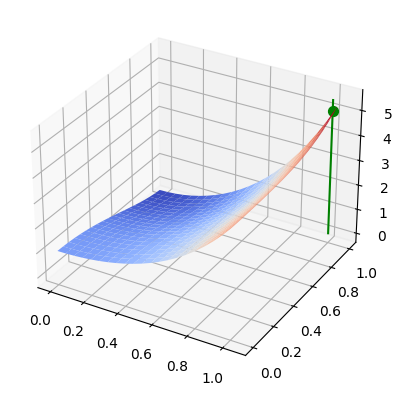

In [ ]:
## Define Python function
def func_1(x):
    f=(x[0]**2+(x[1]+1)**2)*(x[0]**2+(x[1]-1)**2)

    return f

#we investigate the point that  is a candidate for a minimum
xtest = np.array([1,1])
ftest = func_1(xtest)
print("f(x*) = ",func_1(xtest),"\n")

## Make 3D plot to visualize
x1 = np.arange(0.0,1.1,0.05)
x2 = np.arange(0.0,1.0,0.05)

# Create a matrix of all points to sample
X1, X2 = np.meshgrid(x1, x2)
n1 = len(x1)
n2 = len(x2)


F = np.zeros([n2, n1])

xtemp = np.zeros(2)

# Evaluate f(x) over grid
for i in range(0,n1):
    xtemp[0] = x1[i]
    for j in range(0,n2):
        xtemp[1] = x2[j]
        F[j,i] = func_1(xtemp)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot f(x)
surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

# Add candidate point
ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)


fmax = np.amax(F)
fmin = np.amin(F)
ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")

plt.show()

In [ ]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x):


    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

  #  if(verbose):
     #   print("***** grad_central at x = ",x,"*****")

    for i in range(0,n):

        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Finite difference formula with central difference
        f_plus = func_1(x + e)
        f_minus = func_1(x - e)


        #CENTRAL DIFFERENCE APPROXIMATION
        grad[i] = (f_plus - f_minus)/(2*eps)



    return grad

grad = grad_central(xtest)
print(grad)

[12.  4.]


In [ ]:
def hessian_central(x):


    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Evaluate gradient twice
        grad_plus = grad_central(x + e)
        grad_minus = grad_central(x - e)

        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)



    return H

H = hessian_central(xtest)
print(H)

[[19.99933552  8.00004507]
 [ 8.00004507 11.99951249]]


In [ ]:
#Using symbolic python to find gradient

# Define function to use with symbolic computing
def f(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

# Define function to use later
def grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])

x = np.array([0.7395,0.3144])
print("The exact gradient is \n",grad_exact(x))

The exact gradient is 
 [0.00390193 0.01507813]


In [ ]:
def f(x1,x2):

    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


def hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])

x = np.array([0.7395,0.3144])
print("The exact Hessian is \n",hes_exact(x))

The exact Hessian is 
 [[ 76.99960509 108.34139034]
 [108.34139034 392.71911223]]


In [ ]:
# Computing Eiegenvalues of the Hessian Matrix
#print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n"
)
#print("Eigenvectors = \n",v,"\n")

Eigenvalues =  [24.94369666+0.j  7.05515136+0.j] 



 grad f is not equal to zero. Hence, this point is not a stationary point. It is a point where the function has a non-zerogradient.

# is this function convex?

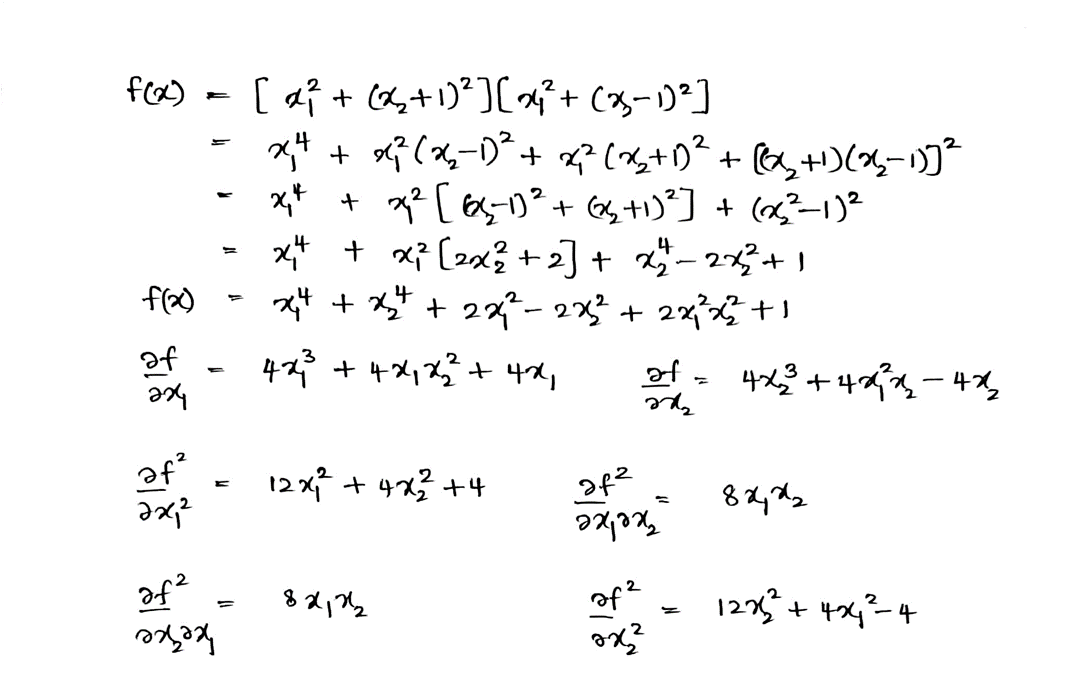

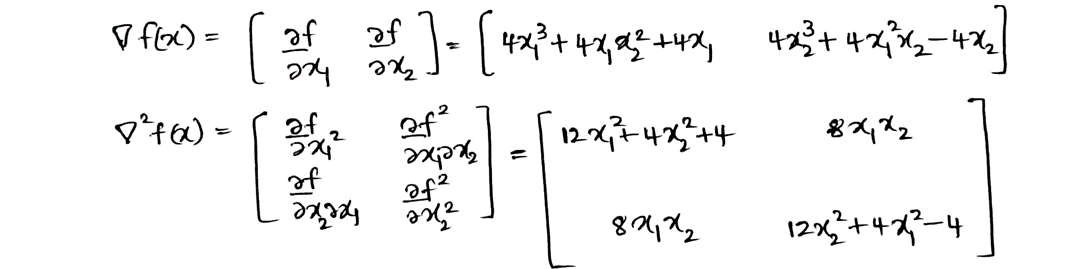

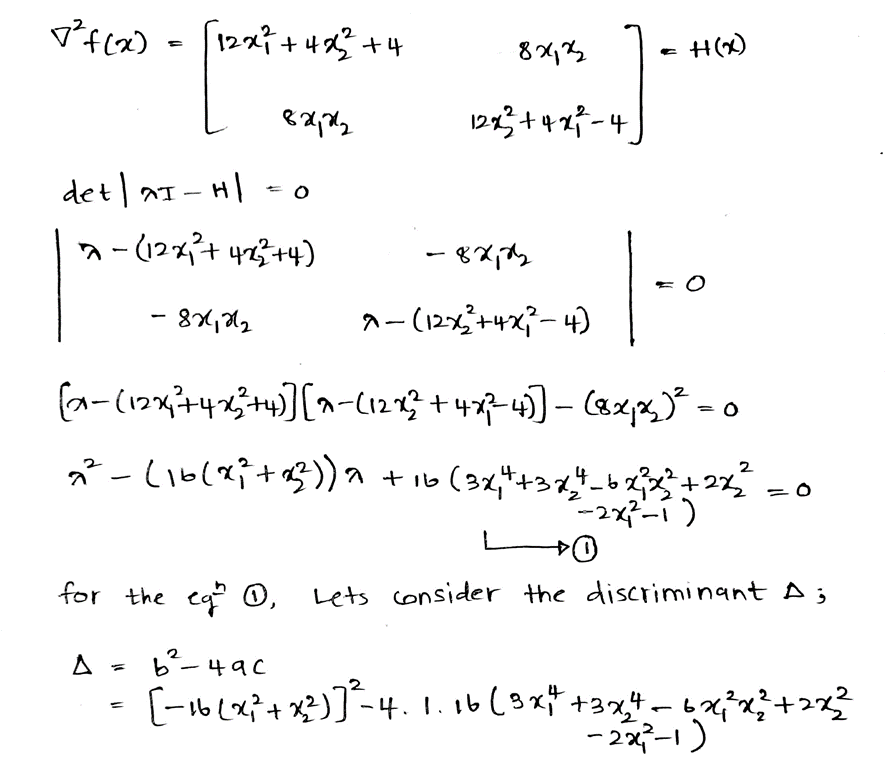

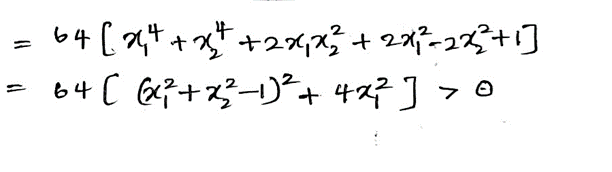

Since the discriminant is always non-negative, this means the quadratic equation that results in
eigenvalues always has real roots. Hence, the Hessian matrix has both positive and negative eigenvalues,
depending on the values of x1 and x2.


Therefore, the function f(x) is neither always convex nor always concave. The function’s convexity
depends on the values of x1 and x2